# Proyecto - Módulo 2

20/04/2023
## Simulación de portafolios de inversión
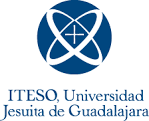

**Integrantes:**

*Alberto Marín*

  - Exp: 740526 Correo: alberto.marin@iteso.mx

*Ana Luisa Espinoza López*

  - Exp: 734753 Correo: ana.espinoza@iteso.mx


*Kevin Emiliano Ayala Montoya*

  - Exp:745973  Correo: @iteso.mx

## Objetivos

1. Objetivo General
    - Simular portafolios de inversión modificando la diversificación de los activos para comparar su rendimiento. 
    

2. Objetivos Específicos
    - Comparar el rendimiento de un portafolio variando los activos dentro de un mismo sector utilizando simulaciones
    - Utilizar la simulación para comparar el rendimiento de un portafolio modificando el peso de cada acción

# Modelo que representa el problema

Para realizar las simulaciones se requirieron parámetros estadísticos de cada conjunto de datos con el fin de poder simular su comportamiento. Estos parámetros son la media y desviación estándar. La media se puede definir como un valor promedio de un conjunto de datos numéricos, se calcula de la siguiente manera (López, 2021):

$$\bar{x} = \frac{\sum_{i=1}^{n}{x_i}}{n} $$

En la misma línea, la desviación estándar es otra medida estadística que calcula la dispersión media de una variable. Es decir, mide la dispersión de los datos con relación a la media aritmética (López, 2020). Se calcula de la siguiente forma: 

$$σ = \sqrt{\frac{\sum_{i=1}^{n}{(x_i-\bar{x})^2}}{n}} $$

De acuerdo con Poldrack (2021), utilizando estas medidas estadísticas es posible establecer un dominio posible de valores y una distribución de probabilidad. A partir de esto, es posible realizar la simulación Montecarlo con números aleatorios dentro de este dominio para estimar la probabilidad de un resultado específico repitiendo el proceso cualquier cantidad de veces. 

In [1]:
# Instalación del paquete
!pip install yfinance

# conda install pandas-datareader
# pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def getClose(names, start, end):
    return yf.download(names, start=start, end=end)["Adj Close"]


## Planteamiento del problema

Se proponen dos portafolios de inversión, ambos con seis activos pero modificando el porcentaje de inversión de capital en cada uno y modificando los activos en los que se invertirán. Se utilizará la simulación montecarlo para poder evaluar, visualizar y comparar el rendimiento de los distintos portafolios y determinar cual es el mejor de ellos.

![portafolios.png](attachment:portafolios.png)

### Portafolio 1
a1 = "VTSMX"
a2 = "VGSIX"
a3 = "VTMGX"
a4 = "VEIEX"
a5 = "TLT"
a6 = "VIPSX"
Cap = 10000
c1 = Cap*0.30
c2 = Cap*0.20
c3 = Cap*0.15
c4 = Cap*0.05
c5 = Cap*0.15
c6 = Cap*0.15

In [4]:
a1 = "VTSMX"
a2 = "VGSIX"
a3 = "VTMGX"
a4 = "VEIEX"
a5 = "TLT"
a6 = "VIPSX"
Cap = 10000
c1 = Cap*0.30
c2 = Cap*0.20
c3 = Cap*0.15
c4 = Cap*0.05
c5 = Cap*0.15
c6 = Cap*0.15
ticker = a1,a2,a3,a4,a5,a6
periodos = 1257 # Cantidad en dias de simulaciones
inicio = "2015-01-01" #inicio de datos
final = "2019-12-31" #final de datos
fecha = "2020-01-01" # Primer dato a simular
ffinal = "2022-12-31" #ultimo dato a simular
per = 365*3 # Datos futuros a simular
data_aapl = getClose(ticker,inicio,final)
#data_aapl.plot.hist()


[*********************100%***********************]  6 of 6 completed


In [5]:
data_aapl.describe()

,TLT,VEIEX,VGSIX,VIPSX,VTMGX,VTSMX
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,111.378376,21.816248,22.462099,10.658743,10.938287,56.166920
std,8.147651,2.690534,2.266176,0.315630,1.145631,9.438039
min,96.759972,15.037102,17.975237,10.073915,8.385994,40.122353
25%,105.776260,19.943319,20.867241,10.497035,9.846574,46.652325
50%,109.938141,22.064123,22.285049,10.620103,11.068615,55.615543
75%,113.537003,23.968912,23.301208,10.751198,12.013558,64.614090
max,137.883041,28.038668,28.314682,11.560163,13.246049,76.494553


Calcule los rendimientos diarios junto con sus características estadísticas

<Axes: ylabel='Frequency'>

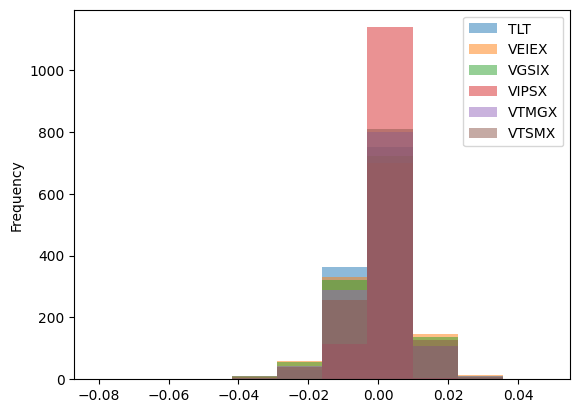

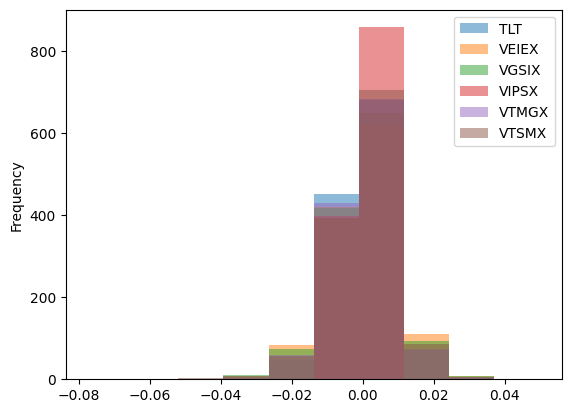

In [6]:
R = (data_aapl - data_aapl.shift())/data_aapl.shift()
r = np.log(data_aapl/data_aapl.shift())

r.plot.hist(alpha = 0.5)
R.plot.hist(alpha = 0.5)

In [7]:
R_1_mean = R[a1].mean()
R_1_std = R[a1].std()

R_2_mean = R[a2].mean()
R_2_std = R[a2].std()

R_3_mean = R[a3].mean()
R_3_std = R[a3].std()

R_4_mean = R[a4].mean()
R_4_std = R[a4].std()

R_5_mean = R[a5].mean()
R_5_std = R[a5].std()

R_6_mean = R[a6].mean()
R_6_std = R[a6].std()


In [8]:
def sim_r(media, std, inicio, dias, N):
    # media 
    # desviación estándar
    # desde qué fecha inicio a simular
    # cuántos días voy a simular
    # N: cuántas simulaciones
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index = fechas, data = r)
r_1_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_2_simulados = sim_r(R_2_mean, R_2_std, fecha, per, 1000)
r_3_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_4_simulados = sim_r(R_2_mean, R_2_std, fecha, per, 1000)
r_5_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_6_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)


In [9]:
ra_1_simulados = (r_1_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_2_simulados = (r_2_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_3_simulados = (r_3_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_4_simulados = (r_4_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_5_simulados = (r_5_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_6_simulados = (r_6_simulados + 1).cumprod() # r_simulados son cumprod es producto acumulado
ra_6_simulados

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-01-01,0.993309,0.995768,0.996488,0.994768,0.999248,0.998174,1.005734,1.008830,1.001371,1.002210,...,0.998518,0.992580,0.974617,1.015476,0.993547,0.998138,1.001038,0.991821,1.000470,1.003428
2020-01-02,0.995676,1.008674,0.985947,1.004134,1.009742,0.985405,1.001952,0.990447,1.000104,0.996428,...,1.004513,0.984512,0.974721,1.025773,0.988171,0.988880,0.983800,0.996824,1.020971,0.998688
2020-01-03,0.979800,1.011615,0.994821,1.000845,1.028628,0.979787,0.994058,0.992042,0.997336,1.005313,...,1.003134,0.985750,0.982422,1.007968,0.985635,0.978626,0.971791,1.004824,1.017047,1.002780
2020-01-04,0.987085,1.024056,0.984613,1.006105,1.040537,0.983070,0.992155,0.993116,0.986727,1.003220,...,0.998396,0.981367,0.986198,1.004930,0.980944,0.981617,0.974447,1.003996,1.028847,0.989768
2020-01-05,1.003375,1.023051,0.983868,1.005547,1.030508,0.992530,0.989604,0.989060,0.997560,1.001772,...,0.997433,0.993016,0.979637,0.994714,0.986444,0.987200,0.978194,1.012684,1.036126,1.001055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,1.170484,1.738237,1.012419,2.060701,1.755239,1.867295,1.336037,1.127249,1.984813,1.753558,...,1.734668,1.158782,1.465232,1.068820,1.173885,1.135595,0.994957,1.302014,1.025572,1.180399
2022-12-27,1.171360,1.741919,1.022069,2.075559,1.760826,1.868261,1.327432,1.119781,1.969891,1.745641,...,1.712910,1.157128,1.455852,1.057016,1.179284,1.141077,0.990688,1.304474,1.025732,1.180747
2022-12-28,1.160500,1.772538,1.033675,2.078395,1.750608,1.855823,1.328350,1.118276,1.957152,1.724909,...,1.734149,1.156343,1.456398,1.054029,1.182386,1.143850,0.994247,1.303739,1.020994,1.189594
2022-12-29,1.165863,1.750743,1.029446,2.046923,1.767733,1.851539,1.331483,1.111633,1.969013,1.700334,...,1.761928,1.164447,1.467084,1.055929,1.190664,1.144039,0.995277,1.299814,1.021881,1.191121


Calcule los precios con base en los rendimientos simulados

In [10]:
precios_1_simulados = ((r_1_simulados + 1).cumprod()*c1).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_2_simulados = ((r_2_simulados + 1).cumprod()*c2).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_3_simulados = ((r_3_simulados + 1).cumprod()*c3).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_4_simulados = ((r_4_simulados + 1).cumprod()*c4).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_5_simulados = ((r_5_simulados + 1).cumprod()*c5).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_6_simulados = ((r_6_simulados + 1).cumprod()*c6).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_6_simulados

2020-01-01    1500.756274
2020-01-02    1501.615473
2020-01-03    1502.370919
2020-01-04    1503.271331
2020-01-05    1503.595553
                 ...     
2022-12-26    2452.646345
2022-12-27    2453.581598
2022-12-28    2454.275020
2022-12-29    2455.732354
2022-12-30    2457.627291
Freq: D, Length: 1095, dtype: float64

In [11]:
m1 = pd.DataFrame(precios_1_simulados)
m2 = pd.DataFrame(precios_2_simulados)
m3 = pd.DataFrame(precios_3_simulados)
m4 = pd.DataFrame(precios_4_simulados)
m5 = pd.DataFrame(precios_5_simulados)
m6 = pd.DataFrame(precios_6_simulados)


In [12]:

df = pd.concat([m1,m2,m3,m4,m5,m6], axis=1)
df

,0,0,0,0,0,0
2020-01-01,3001.675293,2001.266342,1500.065958,500.100552,1500.742206,1500.756274
2020-01-02,3003.041144,2000.663541,1500.375904,500.165300,1500.527833,1501.615473
2020-01-03,3005.361866,2001.841704,1501.235080,500.253546,1501.284599,1502.370919
2020-01-04,3008.770600,2003.455626,1501.581153,500.271564,1501.920256,1503.271331
2020-01-05,3010.504888,2004.412816,1502.373552,500.611406,1502.415644,1503.595553
...,...,...,...,...,...,...
2022-12-26,4934.433400,2765.954015,2454.584911,704.088201,2474.975468,2452.646345
2022-12-27,4938.679893,2768.061148,2455.059469,704.591898,2476.592900,2453.581598
2022-12-28,4938.524466,2767.563784,2455.566301,704.793781,2478.059983,2454.275020
2022-12-29,4939.919449,2768.969109,2455.905922,704.861655,2479.772575,2455.732354


In [13]:
l = df.sum(axis=1)
#l.plot()

In [14]:

data = getClose(ticker,fecha,ffinal)

R = (data - data.shift())/data.shift()
#R

[*********************100%***********************]  6 of 6 completed


In [15]:
rendimientos_1 = (R[a1] + 1).cumprod()*c1
rendimientos_2 = (R[a2] + 1).cumprod()*c2
rendimientos_3 = (R[a3] + 1).cumprod()*c3
rendimientos_4 = (R[a4] + 1).cumprod()*c4
rendimientos_5 = (R[a5] + 1).cumprod()*c5
rendimientos_6 = (R[a6] + 1).cumprod()*c6
rendimientos_6

Date
2020-01-02            NaN
2020-01-03    1506.797101
2020-01-06    1502.265576
2020-01-07    1498.866652
2020-01-08    1496.601077
                 ...     
2022-12-23    1544.360653
2022-12-27    1540.447612
2022-12-28    1539.143223
2022-12-29    1543.056265
2022-12-30    1537.838835
Name: VIPSX, Length: 756, dtype: float64

In [16]:
g1 = pd.DataFrame(rendimientos_1)
g2 = pd.DataFrame(rendimientos_2)
g3 = pd.DataFrame(rendimientos_3)
g4 = pd.DataFrame(rendimientos_4)
g5 = pd.DataFrame(rendimientos_5)
g6 = pd.DataFrame(rendimientos_6)
g1 = pd.DataFrame.dropna(g1)
g2 = pd.DataFrame.dropna(g2)
g3 = pd.DataFrame.dropna(g3)
g4 = pd.DataFrame.dropna(g4)
g5 = pd.DataFrame.dropna(g5)
g6 = pd.DataFrame.dropna(g6)

In [17]:

dg = pd.concat([g1,g2,g3,g4,g5,g6], axis=1)
dg # DataFrame de los datos de los activos multiplicado por el capital invertido en cada uno

,VTSMX,VGSIX,VTMGX,VEIEX,TLT,VIPSX
Date,,,,,,
2020-01-03,2981.313246,2017.763187,1488.413125,495.460891,1523.100195,1506.797101
2020-01-06,2991.404093,2019.078655,1490.519690,492.492999,1514.451115,1502.265576
2020-01-07,2983.929690,1995.394683,1488.413125,493.191318,1507.006294,1498.866652
2020-01-08,2998.131622,2002.631352,1488.413125,492.842194,1497.043767,1496.601077
2020-01-09,3017.192111,2002.631352,1493.679867,498.254203,1502.298444,1497.733927
...,...,...,...,...,...,...
2022-12-23,3635.908287,2001.721145,1548.894896,463.724769,1179.708679,1544.360653
2022-12-27,3620.295095,2000.993230,1551.186128,468.833130,1156.382386,1540.447612
2022-12-28,3575.407279,1966.782046,1536.292791,465.616777,1149.569345,1539.143223


### Gráfica del monto 


Text(0.5, 1.0, 'Monto de Simulación')

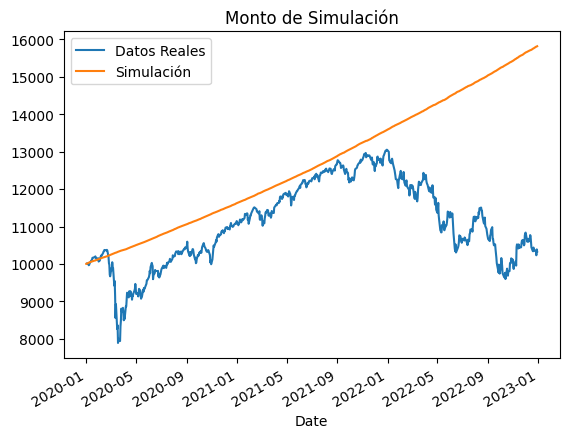

In [18]:
k = dg.sum(axis=1)
k.plot(label="Datos Reales")
l.plot(label="Simulación")
plt.legend(loc="best")
plt.title("Monto de Simulación")

In [19]:
print(k.describe()) #data
#print(l.describe()) #simulacion

count      755.000000
mean     11079.214604
std       1113.999986
min       7892.857206
25%      10239.307028
50%      11035.673745
75%      12111.818768
max      13049.256297
dtype: float64


### Gráfica del rendimiento acumulado.

Text(0.5, 1.0, 'Rendimiento Acumulado')

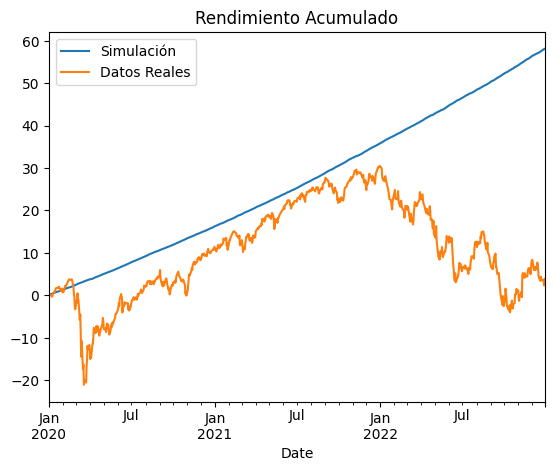

In [20]:
rend_data = ((k/Cap)-1)*100
rend_simulacion = ((l/Cap)-1)*100
x = 0

rend_simulacion.plot(label="Simulación")
rend_data.plot(label="Datos Reales")
plt.legend(loc="best")
plt.title("Rendimiento Acumulado")

### Rendimientos simulados y reales diarios del portafolio completo.

Text(0.5, 1.0, 'Simulación de Rendimientos')

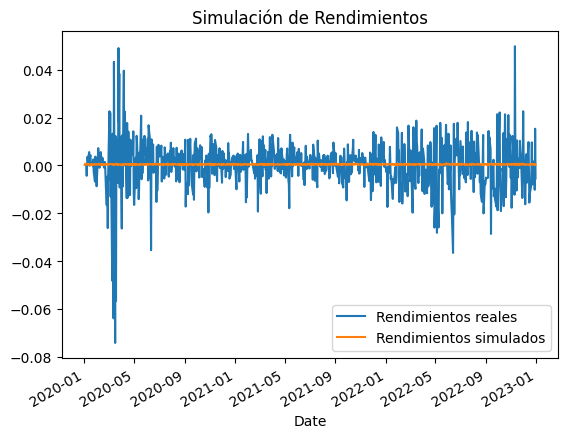

In [21]:
Rend_data = ((k - k.shift())/k.shift())
Rend_data.plot(label="Rendimientos reales")
Rend_sim = ((l - l.shift())/l.shift())
Rend_sim.plot(label="Rendimientos simulados")
plt.legend(loc="best")
plt.title("Simulación de Rendimientos")

### Mayor pérdida

In [22]:
print("Mayor perdida según la simulación     ",int(rend_simulacion.min()),"%")
print("Mayor perdida según la data historica ",int(rend_data.min()),"%")

Mayor perdida según la simulación      0 %
Mayor perdida según la data historica  -21 %


### Rendimiento final acumulado

In [23]:
print("Rendimiento final según la simulación     ",int(rend_simulacion[-1]),"%")
print("Rendimiento final según la data historica ",int(rend_data[-1]),"%")

Rendimiento final según la simulación      58 %
Rendimiento final según la data historica  3 %


### Portafolio 2
a1 = "NKLA"
a2 = "BNGO"
a3 = "AMC"
a4 = "TQQQ"
a5 = "KO"
a6 = "ATOS"
Cap = 10000
c1 = Cap*1/6
c2 = Cap*1/6
c3 = Cap*1/6
c4 = Cap*1/6
c5 = Cap*1/6
c6 = Cap*1/6

In [24]:
a1 = "NKLA"
a2 = "BNGO"
a3 = "AMC"
a4 = "TQQQ"
a5 = "KO"
a6 = "ATOS"
Cap = 10000
c1 = Cap*(1/6)
c2 = Cap*(1/6)
c3 = Cap*(1/6)
c4 = Cap*(1/6)
c5 = Cap*(1/6)
c6 = Cap*(1/6)
ticker = a1,a2,a3,a4,a5,a6
periodos = 1257 # Cantidad en dias de simulaciones
inicio = "2015-01-01" #inicio de datos
final = "2019-12-31" #final de datos
fecha = "2020-01-01" # Primer dato a simular
ffinal = "2022-12-31" #ultimo dato a simular
per = 365*3 # Datos futuros a simular
data_aapl = getClose(ticker,inicio,final)
#data_aapl.plot.hist()


[*********************100%***********************]  6 of 6 completed


<Axes: ylabel='Frequency'>

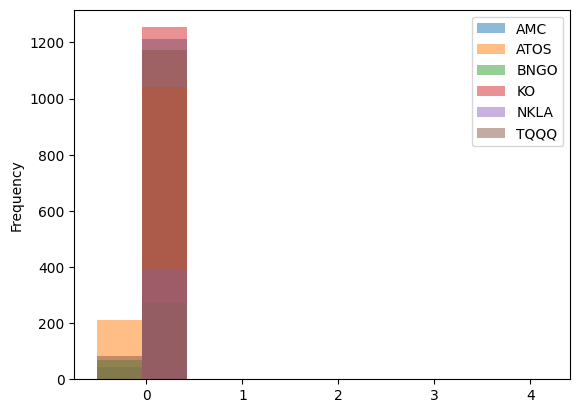

In [25]:
R = (data_aapl - data_aapl.shift())/data_aapl.shift()
r = np.log(data_aapl/data_aapl.shift())

R.plot.hist(alpha = 0.5)

In [26]:
R_1_mean = R[a1].mean()
R_1_std = R[a1].std()

R_2_mean = R[a2].mean()
R_2_std = R[a2].std()

R_3_mean = R[a3].mean()
R_3_std = R[a3].std()

R_4_mean = R[a4].mean()
R_4_std = R[a4].std()

R_5_mean = R[a5].mean()
R_5_std = R[a5].std()

R_6_mean = R[a6].mean()
R_6_std = R[a6].std()


In [27]:
def sim_r(media, std, inicio, dias, N):
    # media 
    # desviación estándar
    # desde qué fecha inicio a simular
    # cuántos días voy a simular
    # N: cuántas simulaciones
    r = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(inicio, periods=dias)
    return pd.DataFrame(index = fechas, data = r)
r_1_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_2_simulados = sim_r(R_2_mean, R_2_std, fecha, per, 1000)
r_3_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_4_simulados = sim_r(R_2_mean, R_2_std, fecha, per, 1000)
r_5_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)
r_6_simulados = sim_r(R_1_mean, R_1_std, fecha, per, 1000)


In [42]:
precios_1_simulados = ((r_1_simulados + 1).cumprod()*c1).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_2_simulados = ((r_2_simulados + 1).cumprod()*c2).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_3_simulados = ((r_3_simulados + 1).cumprod()*c3).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_4_simulados = ((r_4_simulados + 1).cumprod()*c4).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_5_simulados = ((r_5_simulados + 1).cumprod()*c5).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_6_simulados = ((r_6_simulados + 1).cumprod()*c6).mean(axis=1) # r_simulados son cumprod es producto acumulado
precios_6_simulados

2020-01-01    1666.769015
2020-01-02    1666.909697
2020-01-03    1667.177265
2020-01-04    1667.434692
2020-01-05    1667.619400
                 ...     
2022-12-26    2044.159504
2022-12-27    2044.480663
2022-12-28    2044.809550
2022-12-29    2045.164964
2022-12-30    2045.700366
Freq: D, Length: 1095, dtype: float64

In [43]:
m1 = pd.DataFrame(precios_1_simulados)
m2 = pd.DataFrame(precios_2_simulados)
m3 = pd.DataFrame(precios_3_simulados)
m4 = pd.DataFrame(precios_4_simulados)
m5 = pd.DataFrame(precios_5_simulados)
m6 = pd.DataFrame(precios_6_simulados)
df = pd.concat([m1,m2,m3,m4,m5,m6], axis=1)

In [44]:
df

,0,0,0,0,0,0
2020-01-01,1666.922572,1675.846022,1666.849935,1686.384158,1666.968507,1666.769015
2020-01-02,1667.231241,1685.948584,1667.130151,1675.763122,1667.276898,1666.909697
2020-01-03,1667.502549,1724.337614,1667.265833,1682.030179,1667.491377,1667.177265
2020-01-04,1667.835249,1747.791155,1667.587862,1676.848476,1667.616302,1667.434692
2020-01-05,1667.981940,1775.217278,1667.816126,1667.951931,1667.863593,1667.619400
...,...,...,...,...,...,...
2022-12-26,2041.069468,66.483721,2047.216724,13.652480,2052.685279,2044.159504
2022-12-27,2041.599789,52.525146,2047.519518,12.792703,2053.224157,2044.480663
2022-12-28,2041.898657,61.428135,2047.717657,13.186776,2053.549165,2044.809550
2022-12-29,2042.401543,68.409726,2048.124252,12.320712,2053.630825,2045.164964


In [45]:
l = df.sum(axis=1)
data = getClose(ticker,fecha,ffinal)

R = (data - data.shift())/data.shift()
#R

[*********************100%***********************]  6 of 6 completed


In [46]:
rendimientos_1 = (R[a1] + 1).cumprod()*c1
rendimientos_2 = (R[a2] + 1).cumprod()*c2
rendimientos_3 = (R[a3] + 1).cumprod()*c3
rendimientos_4 = (R[a4] + 1).cumprod()*c4
rendimientos_5 = (R[a5] + 1).cumprod()*c5
rendimientos_6 = (R[a6] + 1).cumprod()*c6


In [47]:
g1 = pd.DataFrame(rendimientos_1)
g2 = pd.DataFrame(rendimientos_2)
g3 = pd.DataFrame(rendimientos_3)
g4 = pd.DataFrame(rendimientos_4)
g5 = pd.DataFrame(rendimientos_5)
g6 = pd.DataFrame(rendimientos_6)
g1 = pd.DataFrame.dropna(g1)
g2 = pd.DataFrame.dropna(g2)
g3 = pd.DataFrame.dropna(g3)
g4 = pd.DataFrame.dropna(g4)
g5 = pd.DataFrame.dropna(g5)
g6 = pd.DataFrame.dropna(g6)
dg = pd.concat([g1,g2,g3,g4,g5,g6], axis=1)
dg

,NKLA,BNGO,AMC,TQQQ,KO,ATOS
Date,,,,,,
2020-01-03,1663.436772,1653.225819,1635.388743,1621.348960,1657.573558,1666.666667
2020-01-06,1666.666667,1706.989209,1590.705979,1652.172343,1656.967760,1656.184497
2020-01-07,1668.281691,1666.666667,1592.940155,1650.154191,1644.238202,1698.113177
2020-01-08,1670.219689,1666.666667,1478.999124,1688.133098,1647.268726,1687.631007
2020-01-09,1671.511739,1599.462430,1443.252956,1730.698844,1677.274397,1624.737861
...,...,...,...,...,...,...
2022-12-23,423.126609,2043.010711,989.051381,1297.614417,2124.601897,607.966427
2022-12-27,385.981941,1908.602078,905.881179,1242.286901,2137.585214,545.073344
2022-12-28,364.987089,1881.720384,863.172077,1192.123364,2116.279280,524.109004


Text(0.5, 1.0, 'Monto de Simulación')

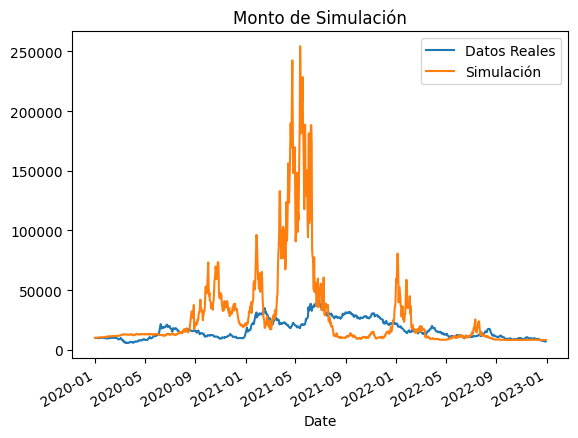

In [48]:
k = dg.sum(axis=1)
k.plot(label="Datos Reales")
l.plot(label="Simulación")
plt.legend(loc="best")
plt.title("Monto de Simulación")

Text(0.5, 1.0, 'Rendimiento Acumulado')

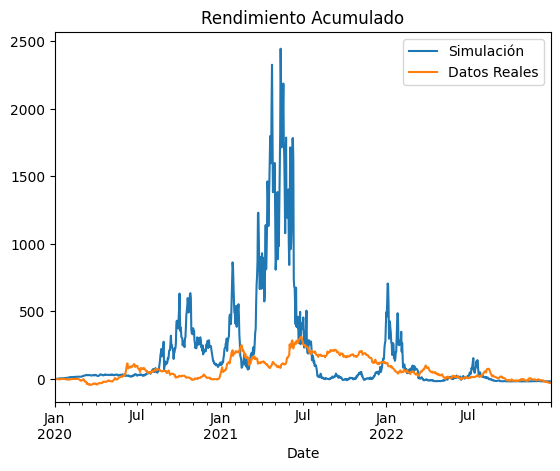

In [49]:
rend_data = ((k/Cap)-1)*100
rend_simulacion = ((l/Cap)-1)*100
x = 0

rend_simulacion.plot(label="Simulación")
rend_data.plot(label="Datos Reales")
plt.legend(loc="best")
plt.title("Rendimiento Acumulado")

### Rendimientos simulados y reales diarios del portafolio completo.

Text(0.5, 1.0, 'Simulación de Rendimientos')

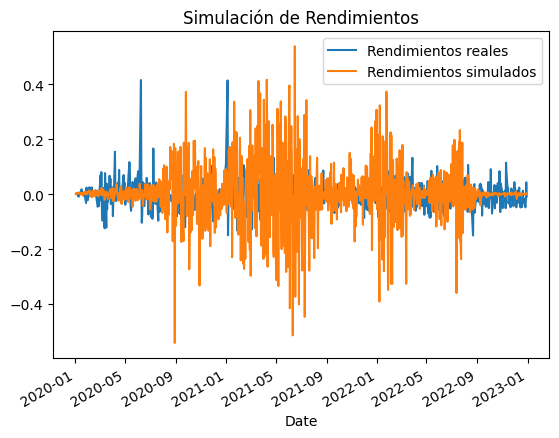

In [51]:
Rend_data = ((k - k.shift())/k.shift())
Rend_data.plot(label="Rendimientos reales")
Rend_sim = ((l - l.shift())/l.shift())
Rend_sim.plot(label="Rendimientos simulados")
plt.legend(loc="best")
plt.title("Simulación de Rendimientos")

### Mayor pérdida

In [36]:
print("Mayor perdida según la simulación     ",int(rend_simulacion.min()),"%")
print("Mayor perdida según la data historica ",int(rend_data.min()),"%")

Mayor perdida según la simulación      0 %
Mayor perdida según la data historica  -42 %


### Rendimiento final acumulado

In [37]:
print("Rendimiento final según la simulación     ",int(rend_simulacion[-1]),"%")
print("Rendimiento final según la data historica ",int(rend_data[-1]),"%")

Rendimiento final según la simulación      58 %
Rendimiento final según la data historica  -28 %


## Solución del problema

Se utilizó la simulación Montecarlo para poder evaluar y visualizar el posible rendimiento de un portafolio de inversión. Se logró expresar el monto final obtenido en base a un capital hipotético y observar qué ocurre con el capital invertido en cada acción. Cabe recalcar que con este método no es posible simular escenarios externos como la pandemia, situaciones políticas o globales que puedan afectar los rendimientos de los activos del portafolio.

## Conclusiones

Mediante la simulación, se pudo observar los diferentes escenarios en un portafolio de inversión con la misma cantidad de activos. Se puede concluir que el rendimiento del portafolio 1 es mayor que el del portafolio 2 y que tiene menos riesgo, por lo que la selección de activos y el porcentaje del capital invertido en cada activo son variables de suma importancia en el rendimiento esperado. Utilizando la simulación se pueden optimizar los portafolios, contrastar y visualizar de forma más fácil por lo que es una herramienta bastante útil en el sector financiero. 

### Referencias Bibliográficas
- López, J. F. (2022). Media. Economipedia. https://economipedia.com/definiciones/media.html
- López, J. F. (2022a). Desviación estándar o típica. Economipedia. https://economipedia.com/definiciones/desviacion-tipica.html
- Poldrack, R. (2021). Capítulo 8 Remuestreo y Simulación | Statistical Thinking for the 21st Century. https://statsthinking21.github.io/statsthinking21-core-spanish-site/resampling-and-simulation.html